<a href="https://colab.research.google.com/github/SatishKV/UCB-capstone-CreditRisk/blob/main/loan_credit_risk_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:


# Load the dataset (replace 'auto_loan_data.csv' with your dataset)
loan_df = pd.read_csv('sample_data/financial_loan.csv')

In [3]:

#Data Exploration
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [4]:
loan_df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [5]:
loan_df['credit_risk_default_flag']=0
loan_df.loc[ (loan_df['dti'] > 0.2)  & (loan_df['int_rate'] > 0.16), 'credit_risk_default_flag'] = 1

loan_df['credit_risk_default_flag'].value_counts()

credit_risk_default_flag
0    37362
1     1214
Name: count, dtype: int64

In [6]:
X = loan_df[['emp_length','home_ownership', 'annual_income','verification_status',
              'purpose', 'term','installment','total_acc', 'int_rate',
             'total_payment','dti']]

y = loan_df['credit_risk_default_flag']

In [7]:


# Define categorical and numerical features
categorical_features = ['emp_length', 'home_ownership', 'purpose',
                        'term','verification_status']
numerical_features = [ 'dti',  'annual_income','installment', 'int_rate',
                      'total_acc', 'total_payment']

# Define preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Apply StandardScaler to numeric features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

In [8]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Define and train a dummy classifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)

#Evaluate model accuracy & score
baseline_score = dummy_classifier.score(X_test,y_test)

### ANSWER CHECK
print("Baseline Model Score:",baseline_score)

Baseline Model Score: 0.9666925868325558


A Simple Model Used **Logistic** **Regression** to build a basic model on loan data.

In [10]:
#Create pipeline with preprocessor and Logistic Regressor
simple_pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(max_iter=1000))])
simple_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['dti', 'annual_income',
                                                   'installment', 'int_rate',
                                                   'total_acc',
                                                   'total_payment']),
                                                 ('cat', OneHotEncoder(),
                                                  ['emp_length',
                                                   'home_ownership', 'purpose',
                                                   'term',
                                                   'verification_status'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [11]:
#Evaluate simple model score
simple_model_score = simple_pipe.score(X_test,y_test)
simple_train_score = simple_pipe.score(X_train,y_train)

### ANSWER CHECK
print("Simple & Default Logistic test Score:",simple_model_score)
print("Simple & Default Logistic train Score:",simple_train_score)

Simple & Default Logistic test Score: 0.9809486780715396
Simple & Default Logistic train Score: 0.9820803629293584


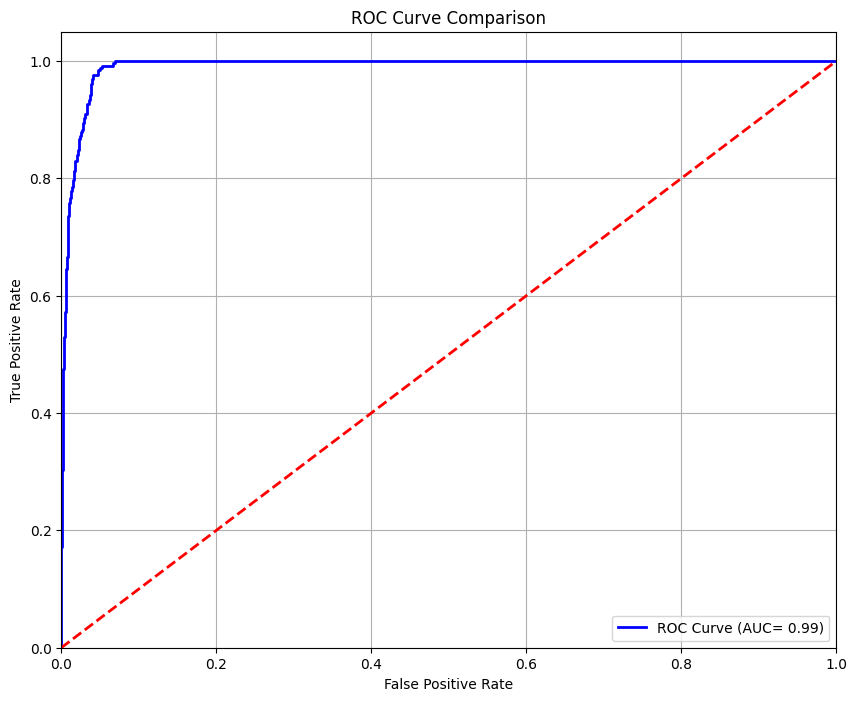

In [12]:
#simple_pipe
# Predict probabilities on the testing data
probas = simple_pipe.predict_proba(X_test)[:,1]
#probas
#y_test
#Compute ROC Curve & AUC
#fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label='yes')
fpr, tpr, thresholds = roc_curve(y_test, probas, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC= %0.2f)' % roc_auc)
#plt.plot(fpr, tpr, label='Logistc' (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', lw= '2' )
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True)
}

Model Name: Logistic Regression
Logistic Regression: Training time: 0.6280s, Training accuracy: 0.9821
Model Name: KNN
KNN: Training time: 0.2618s, Training accuracy: 0.9839
Model Name: Decision Tree
Decision Tree: Training time: 0.0910s, Training accuracy: 1.0000
Model Name: SVM
SVM: Training time: 20.6393s, Training accuracy: 0.9923


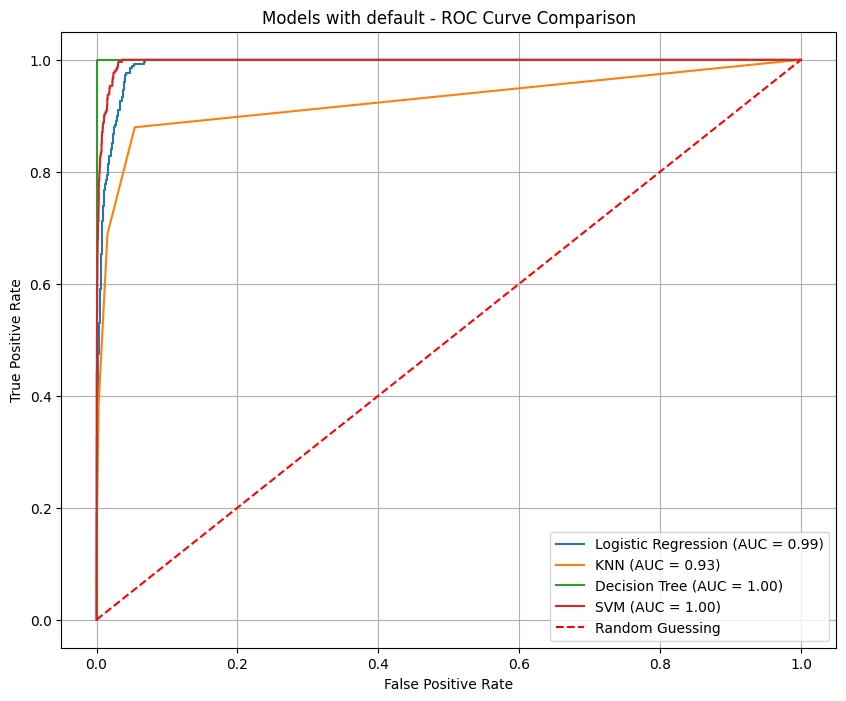

In [14]:
# Create an empty list to store individual DataFrames
dfs = []

# Train classifiers and plot ROC curves
plt.figure(figsize=(10, 8))
# Measure training time and evaluate training accuracy
for name, clf in classifiers.items():
    start_time = time.time()
    # Create pipeline with preprocessor and classifier
    pipe = Pipeline([('preprocessor', preprocessor),
                     ('classifier', clf)])
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Model Name:",name)
    train_accuracy = pipe.score(X_train, y_train)
    # Evaluate test accuracy
    test_accuracy = pipe.score(X_test, y_test)
    model_df = pd.DataFrame({'Model': name, 'Train Time': train_time,'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, index=[0])
    dfs.append(model_df)
    print(f"{name}: Training time: {train_time:.4f}s, Training accuracy: {train_accuracy:.4f}")
    probas = pipe.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models with default - ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()